# Regresion lineal
Precio de una casa en base a ciertas caracteristicas
- ## Preparacion y limpieza de datos

In [2]:
import pandas as pd
datos = pd.read_csv('datosEntrenamientoHousing.csv')

In [3]:
datos['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

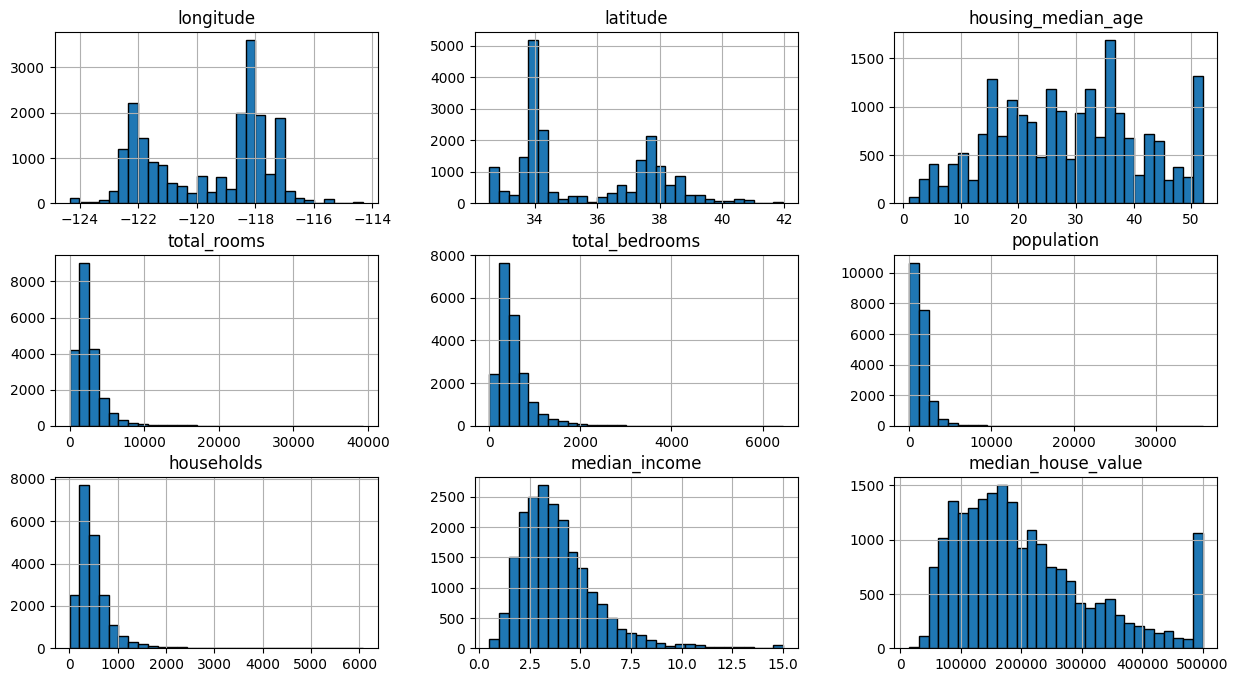

In [6]:
datos.hist(figsize=(15,8), bins=30, edgecolor='black')

/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='latitude', ylabel='longitude'>

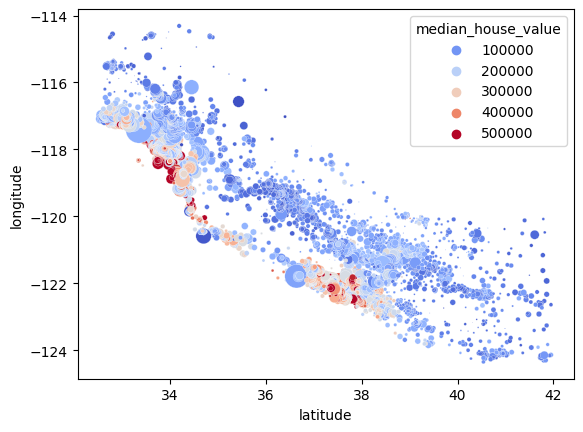

In [7]:
import seaborn as sb
sb.scatterplot(x='latitude',y='longitude', data=datos, hue='median_house_value', palette='coolwarm', s=datos['population']/100)

/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='latitude', ylabel='longitude'>

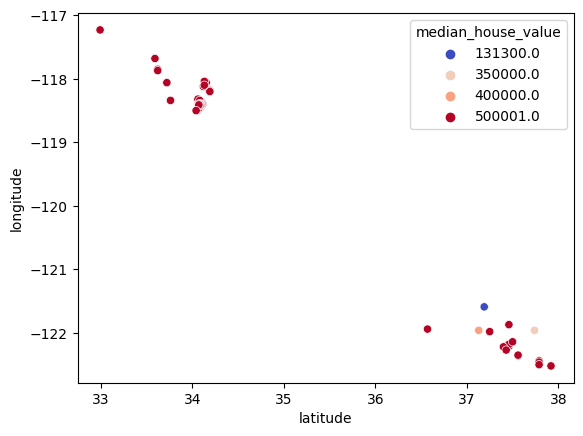

In [8]:
sb.scatterplot(x='latitude',y='longitude', data=datos[(datos.median_income > 14)], hue='median_house_value', palette='coolwarm')

In [9]:
datos_na = datos.dropna()
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
# Convertir la caracteristica categorica a numerica
datos_na['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [11]:
# dummies / one-hot encoding
# near by   inland  near ocean
#   1          0        0  
#   0          0        1
dummies = pd.get_dummies(datos_na['ocean_proximity'], dtype=int)

In [12]:
datos_na.join(dummies)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [13]:
datos_na = datos_na.join(dummies)
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [14]:
datos_na = datos_na.drop(['ocean_proximity'], axis=1)
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [15]:
# Analisis, nuevas caracteristicas
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

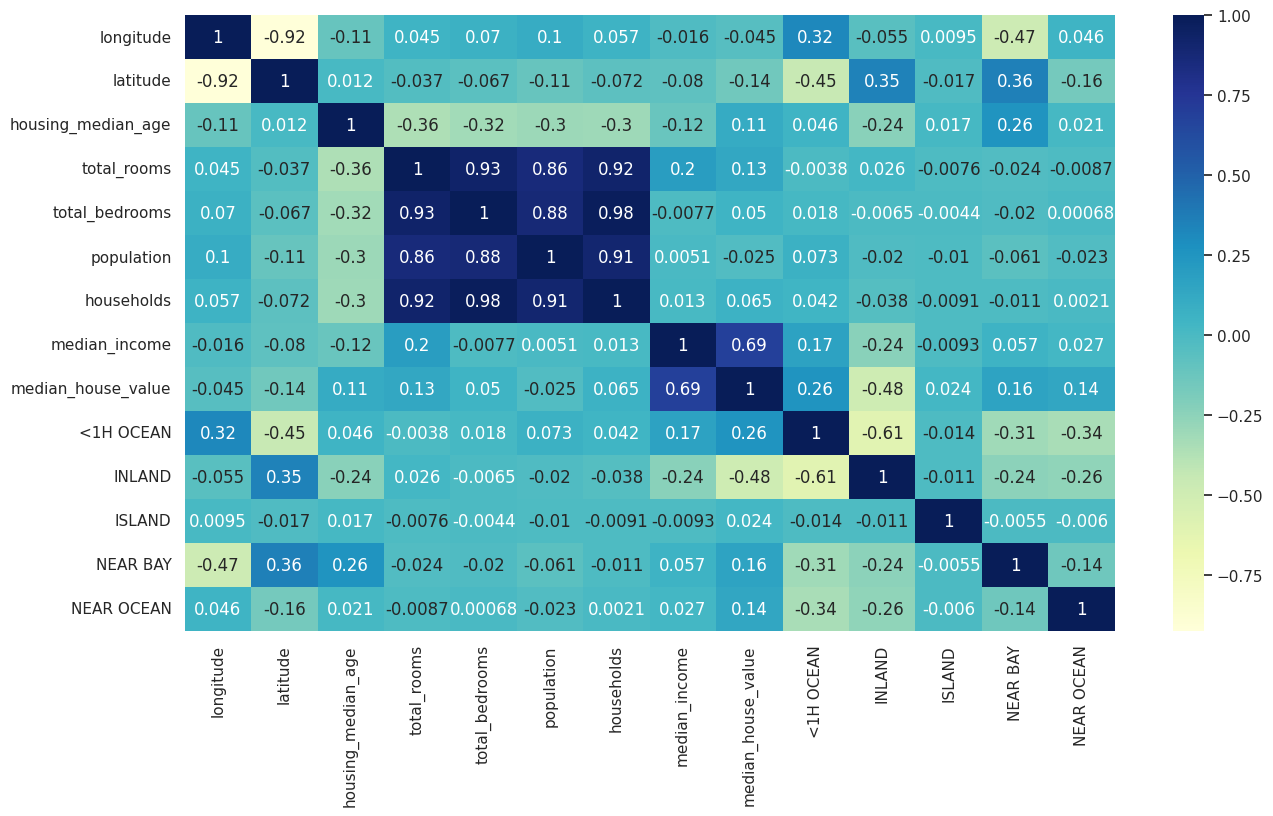

In [16]:
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap='YlGnBu')

In [17]:
datos_na.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='median_house_value', ylabel='median_income'>

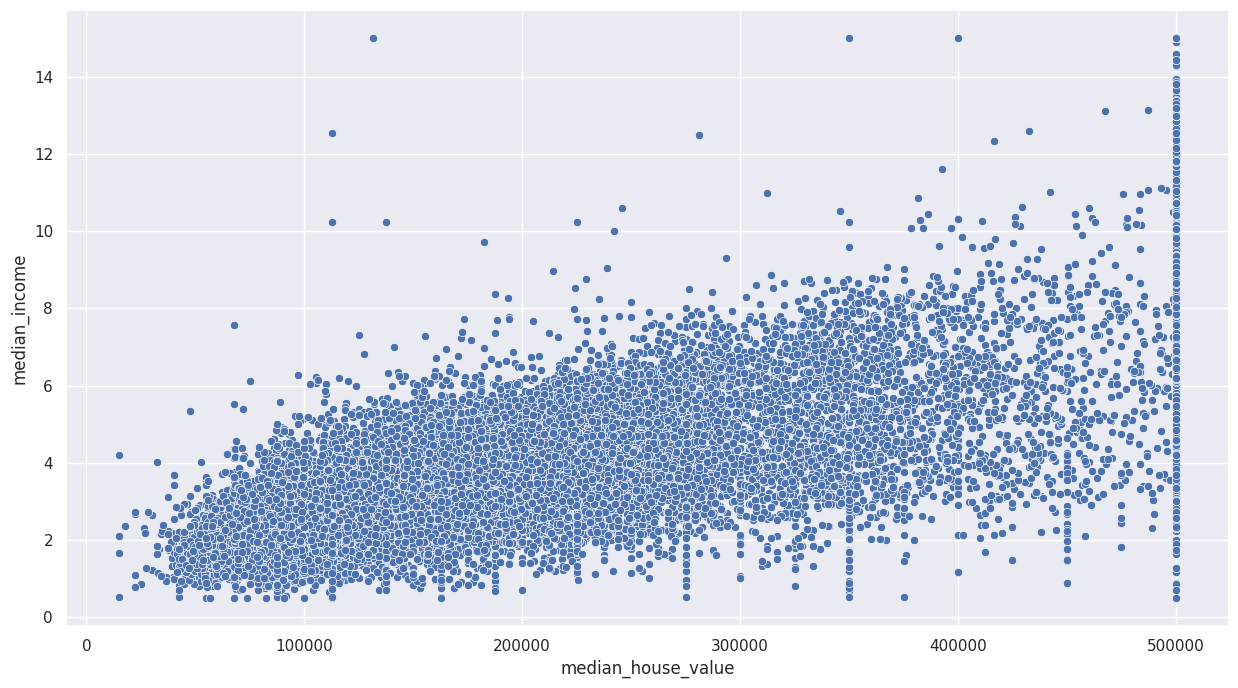

In [18]:
sb.scatterplot(x=datos_na['median_house_value'], y=datos_na['median_income'])

In [19]:
datos_na['bedrooms_ratio'] =  datos_na['total_bedrooms'] / datos_na['total_rooms']

<Axes: >

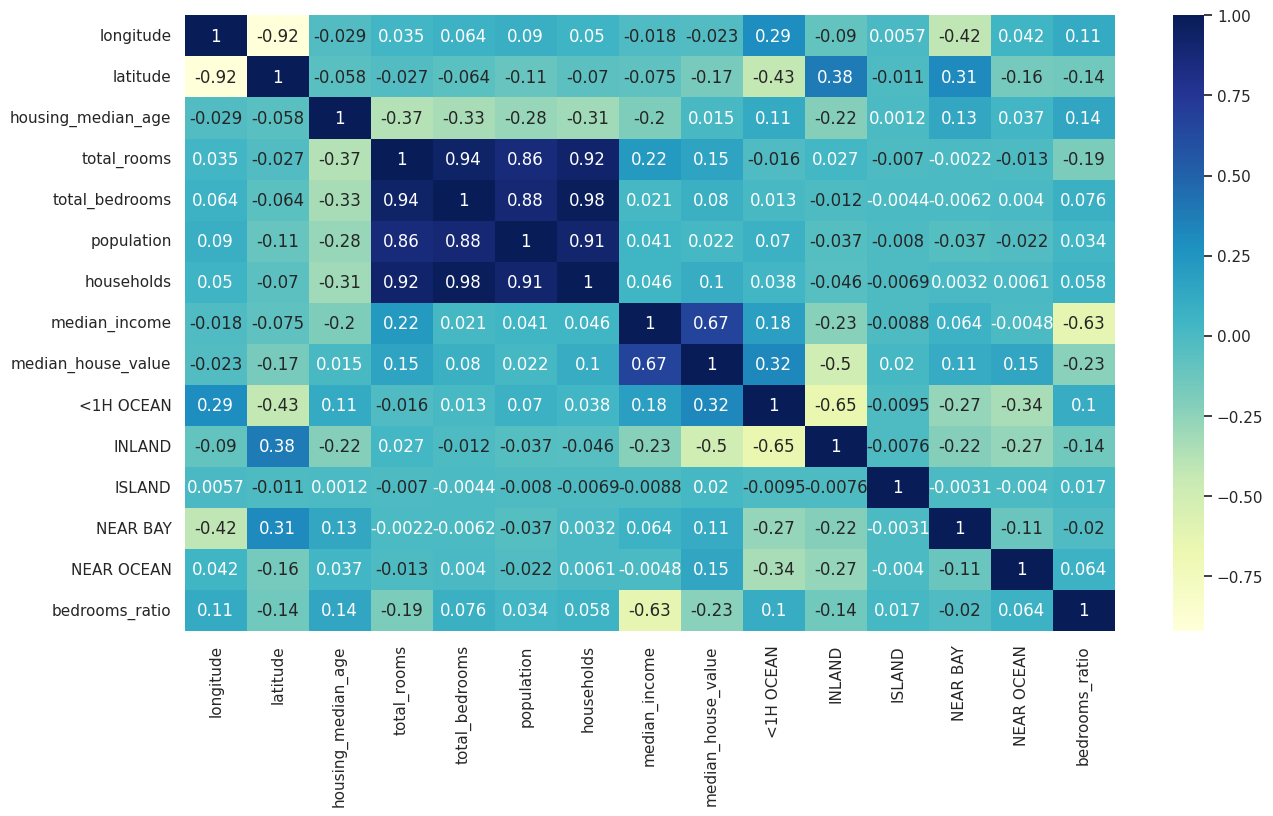

In [45]:
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap='YlGnBu')

In [76]:
# Quitar datos que excedan el limite
# casas de 50 o mas anhos
datos_na = datos_na.drop(datos_na[datos_na['housing_median_age'] >= 50].index)
# casa de 500000 o mas precio
datos_na = datos_na.drop(datos_na[datos_na['median_house_value'] >= 500000].index)
# ingresos mayor o igual a 15
datos_na = datos_na.drop(datos_na[datos_na['median_income'] >= 15].index)
datos_na.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio
count,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.00000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000
mean,-119.478469,35.589778,26.757021,2678.415499,549.407859,1474.617367,509.890300,3.698224,189245.968508,0.44875,0.343611,0.000110,0.082440,0.125089,0.213818
std,1.979162,2.148169,11.267991,2235.553359,430.854654,1167.572934,390.828534,1.565775,95255.885596,0.49738,0.474926,0.010484,0.275042,0.330829,0.055444
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.530000,33.920000,17.000000,1461.000000,300.000000,814.000000,284.000000,2.541100,115300.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.176912
50%,-118.450000,34.240000,27.000000,2146.000000,443.000000,1208.000000,416.000000,3.478400,171200.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.203612
75%,-117.970000,37.670000,36.000000,3191.500000,660.000000,1784.000000,615.000000,4.625000,242850.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.240094
max,-114.310000,41.950000,49.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.147700,499100.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
# Separar las caracteristicas de la etiqueta
x = datos_na.drop(['median_house_value'], axis=1)
y = datos_na['median_house_value']

- ## Entrenamiento

In [78]:
# Separar los datos en 2 partes:
    # Conjunto de entrenamiento
    # Conjunto de pruebas
from sklearn.model_selection import train_test_split

x_ent, x_pru, y_ent, y_pru =  train_test_split(x, y, test_size=.2)

In [79]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x_ent, y_ent)

LinearRegression()

- ## Prediccion

In [80]:
prediccion = modelo.predict(x_pru)

In [81]:
comparativa = {'Predicion': prediccion, 'Valor Real': y_pru, '% Error': prediccion/y_pru}
pd.DataFrame(comparativa)

,Predicion,Valor Real,% Error
5198,110901.574436,96900.0,1.144495
789,200352.540927,180900.0,1.107532
3573,346699.816351,477200.0,0.726529
13409,100149.969726,90600.0,1.105408
16843,274148.240788,281300.0,0.974576
...,...,...,...
14220,282061.813571,234600.0,1.202310
12716,155169.109444,136800.0,1.134277
6357,142122.674999,150300.0,0.945593
7954,172809.441897,156700.0,1.102804


In [82]:
# Overfitting === sobreajuste
print(f'Score con datos de entrenamiento: {modelo.score(x_ent, y_ent)}')
print(f'Score con datos de prueba: {modelo.score(x_pru, y_pru)}')

Score con datos de entrenamiento: 0.6342473403438338
Score con datos de prueba: 0.6348870480812214


In [83]:
# Error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_pru, prediccion)

In [84]:
rmse = np.sqrt(mse)

In [85]:
rmse

57507.13628153453

In [86]:
# Escalamiento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_ent_esc = scaler.fit_transform(x_ent)
x_pru_esc = scaler.fit_transform(x_pru)